In [168]:
import pandas as pd
import numpy as np

In [169]:
data = pd.read_csv('data.csv', parse_dates = ['date'])

In [4]:
g = data[data.ticker == 'GOOG']
g.sort_values(by = 'date').head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
6102161,GOOG,2014-03-27,568.000,568.00,552.92,558.46,13100.0,0.0,1.0,568.000,568.00,552.92,558.46,13100.0
6102162,GOOG,2014-03-28,561.200,566.43,558.67,559.99,41100.0,0.0,1.0,561.200,566.43,558.67,559.99,41100.0
6102163,GOOG,2014-03-31,566.890,567.00,556.93,556.97,10800.0,0.0,1.0,566.890,567.00,556.93,556.97,10800.0
6102164,GOOG,2014-04-01,558.710,568.45,558.71,567.16,7900.0,0.0,1.0,558.710,568.45,558.71,567.16,7900.0
6102165,GOOG,2014-04-02,565.106,604.83,562.19,567.00,146700.0,0.0,1.0,565.106,604.83,562.19,567.00,146700.0


In [5]:
data[data.ticker == 'AAPL'].sort_values(by = 'date').adj_close.plot()

In [6]:
data.dtypes


ticker                 object
date           datetime64[ns]
open                  float64
high                  float64
low                   float64
close                 float64
volume                float64
ex-dividend           float64
split_ratio           float64
adj_open              float64
adj_high              float64
adj_low               float64
adj_close             float64
adj_volume            float64
dtype: object

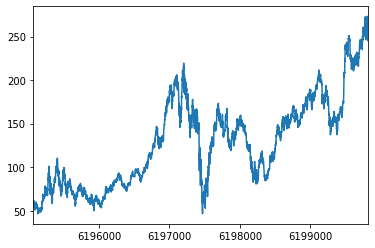

In [27]:
data[data.ticker == 'GS'].adj_close.plot()
d = data[data.ticker == 'GS'].adj_close

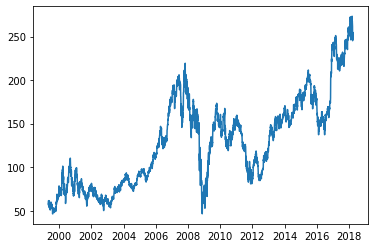

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot('date', 'adj_close', data= data[data.ticker == 'GS'])
plt.show()


In [43]:
data[data.ticker == 'GS'][['date']].iloc[0][0]

Timestamp('1999-05-04 00:00:00')

In [25]:
import sklearn
from sklearn.linear_model import LinearRegression
a = 1

In [26]:
class Estimator:

    def __init__(self, estimator_type):
        '''
        Constructor that takes in the type of estimator as a parameter
        '''
        if estimator_type == 'linreg':
            from sklearn.linear_model import LinearRegression
            self.learner = LinearRegression()

    def get_data(self, start_date, end_date, tickers, data):
        '''
        INPUT - start and end dates as well as list of tickers for the data

        OUTPUT - a dictionary mapping the data for each corresponding ticker
        '''
        dataset = {}
        
        for ticker in tickers:
            try:
                xy = []

                frame = data[(data.ticker == ticker) & (data.date <= end_date) &
                (data.date >= start_date)]

                xy.append(frame[['open', 'high', 'low', 'close', 'volume']])
                
                xy.append(frame[['adj_close']])

                dataset[ticker] = xy
            except:
                print('No such date available in the dataset. Choose dates again.')
                break
        
        return dataset


    def trainer(self, start_date, end_date, tickers, data):
        '''
        INPUT - start and end date for date, list of tickers, and the data set

        OUTPUT - a dictionary mapping each ticker to its trained model
        '''
        train_data = self.get_data(start_date, end_date, tickers, data)

        output = []

        for ticker in tickers:
            X, y = train_data[ticker][0], train_data[ticker][1]
            model = LinearRegression().fit(X,y)
            output.append((ticker, model))
        
        return output

In [27]:
a = 0
a = Estimator('linreg')

o = a.trainer('2002-05-01', '2017-05-01', ['GS'], data)

In [48]:
frame = data[(data.ticker == 'GS') & (data.date <= '2017-05-01') &
                (data.date >= '2002-05-01')]
frame[['open', 'high', 'low', 'close', 'volume']]

,open,high,low,close,volume
6195816,78.55,79.75,77.00,79.21,4153900.0
6195817,80.00,81.00,79.80,80.71,4576800.0
6195818,80.31,80.32,78.45,78.55,3450400.0
6195819,78.80,79.09,75.15,75.16,3258900.0
6195820,76.00,76.10,74.00,74.85,4740400.0
...,...,...,...,...,...
6199588,226.20,227.98,225.15,226.63,3970750.0
6199589,227.10,229.36,226.09,226.20,3587794.0
6199590,226.70,226.70,223.52,225.81,2800420.0
6199591,225.31,226.77,223.72,223.80,2932137.0


In [75]:
class Estimator:

    def __init__(self, estimator_type, trainstart, trainend, teststart,
                    testend, tickers_list, dataset):
        '''
        Constructor that takes in the type of estimator as a parameter
        As well as start and end dates for test and train data, the dataset
        and the list of tickers
        '''
        if estimator_type == 'linreg':
            self.learner = LinearRegression()
        if estimator_type == 'knn':
            self.learner = KNeighborsRegressor()
        if estimator_type == 'gbr':
            self.learner = GradientBoostingRegressor()
        if estimator_type == 'rfr':
            self.learner = RandomForestRegressor()

        self.train_start = trainstart
        self.train_end = trainend
        self.test_start = teststart
        self.test_end = testend

        self.tickers = tickers_list
        self.data = dataset
        self.models = []
        self.predicts = []
        
    def get_data(self, start_date, end_date, ticker):
        '''
        INPUT - self

        OUTPUT - a dictionary mapping the data for each corresponding ticker
        '''
        #dataset = {}
        
        #for ticker in self.tickers:
        try:
            xy = []

            frame = self.data[(self.data.ticker == ticker) & (self.data.date <= end_date) & (self.data.date >= start_date)]

            xy.append(frame[['open', 'high', 'low', 'close', 'volume']])
              
            xy.append(frame[['adj_close']])

                #dataset[ticker] = xy

        except:
            print('No such date available in the dataset. Choose dates again.')
            #break
        
        return xy #dataset


    def train(self):
        '''
        INPUT - self

        OUTPUT - Returns True when models are succesfully learned
        '''

        for ticker in self.tickers:
            train_data = self.get_data(self.train_start, self.train_end, ticker)
            X, y = train_data[0], train_data[1]
            model = self.learner.fit(X,y)
            self.models.append((ticker, model))
        
        return True

    def test(self):
        '''
        INPUT - start and end date for test data as well as list of tickers

        OUTPUT - returns true when test is done successfully
        '''

        test_data = self.get_data(self.test_start, self.test_end)

        for k,v in test_data.items():
            Xtest = v[0]
            ytest = v[1]
            try:
                model = [item[1] for item in self.models if item[0] == k][0]
            except:
                print('Something about ticker consistency not right!')
            self.predicts.append(k, model.predict(Xtest))

        return True

    def show_results(self):
        '''
        INPUT - self

        OUPUT - Outputs the train and test results
        '''

        self.train()

        for tm in self.models:
            test_data = self.get_data(self.test_start, self.test_end, ticker = tm[0])
            X = test_data[0]
            y = test_data[1]
            print("R-squared on test data for {} between {} and {} is {}".format(
                tm[0], self.test_start, self.test_end,
                tm[1].score(X,y)))



In [76]:
es = Estimator('linreg','2002-05-01', '2010-05-01', '2011-05-01', '2013-12-01',['GS'], data)

In [77]:
es.show_results()

R-squared on test data for GS between 2011-05-01 and 2013-12-01 is 0.8917023486010649


In [170]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [79]:
methods = ['linreg', 'knn', 'gbr', 'rfr']
for method in methods:
    a = Estimator(method,'2002-05-01', '2010-05-01', '2011-05-01', '2013-12-01',['GS'], data)
    a.show_results()
    a = 0

R-squared on test data for GS between 2011-05-01 and 2013-12-01 is 0.8917023486010649
R-squared on test data for GS between 2011-05-01 and 2013-12-01 is -2.362709188778102


/home/sepehr/projects/env/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-squared on test data for GS between 2011-05-01 and 2013-12-01 is 0.892163359921428


/home/sepehr/projects/env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/sepehr/projects/env/lib/python3.7/site-packages/ipykernel_launcher.py:66: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


R-squared on test data for GS between 2011-05-01 and 2013-12-01 is 0.8910405751662084


In [184]:
import numpy as np

class Estimator:

    def __init__(self, estimator_type, trainstart, trainend, teststart,
                    testend, tickers_list, dataset):
        '''
        Constructor that takes in the type of estimator as a parameter
        As well as start and end dates for test and train data, the dataset
        and the list of tickers
        '''
        if estimator_type == 'linreg':
            self.learner = LinearRegression()
        if estimator_type == 'lasso':
            self.learner = Lasso()
        if estimator_type == 'knn':
            self.learner = KNeighborsRegressor(n_neighbors = 3, weights = 'distance', algorithm = 'auto')
        if estimator_type == 'gbr':
            self.learner = GradientBoostingRegressor(n_estimators = 10000)
        if estimator_type == 'rfr':
            self.learner = RandomForestRegressor(n_estimators = 1000)

        self.train_start = trainstart
        self.train_end = trainend
        self.test_start = teststart
        self.test_end = testend

        self.tickers = tickers_list
        self.data = dataset
        self.models = []
        self.predicts = []
        
    def get_data(self, start_date, end_date, ticker):
        '''
        INPUT - self

        OUTPUT - X and y as features and labels
        '''
        try:

            frame = self.data[(self.data.ticker == ticker) & 
            (self.data.date <= end_date) & (self.data.date >= start_date)]

            X = np.array(frame[['open', 'high', 'low', 'close', 'volume']])
                
            y = np.ravel(frame[['adj_close']])

        except:
            print('No such date available in the dataset. Choose dates again.')
        
        return X, y


    def train(self):
        '''
        INPUT - self

        OUTPUT - Returns True when models are succesfully learned
        '''

        for ticker in self.tickers:
            X, y  = self.get_data(self.train_start, self.train_end, ticker)
            model = self.learner.fit(X,y)
            self.models.append((ticker, model))
        
        return True

    def test(self):
        '''
        INPUT - start and end date for test data as well as list of tickers

        OUTPUT - returns true when test is done successfully
        '''
        for ticker in self.tickers:
            Xtest, ytest = self.get_data(self.test_start, self.test_end, ticker)
            try:
                model = [item[1] for item in self.models if item[0] == ticker][0]
            except:
                print('Something about ticker consistency not right!')
            self.predicts.append((ticker, model.predict(Xtest)))

        return True

    def show_results(self):
        '''
        INPUT - self

        OUPUT - Outputs the train and test results
        '''

        self.train()

        for tm in self.models:
            X, y = self.get_data(self.test_start, self.test_end, ticker = tm[0])
            print("R-squared on test data for {} between {} and {} is {}".format(
                tm[0], self.test_start, self.test_end,
                tm[1].score(X,y)))



In [174]:
p= Estimator('gbr','2004-05-01', '2016-05-01', '2014-05-01', '2015-09-01',['GS'], data)
p.show_results()

R-squared on test data for GS between 2014-05-01 and 2015-09-01 is 0.9999934960219631


In [185]:
methods = ['linreg', 'knn', 'gbr', 'rfr']
for method in methods:
    a = Estimator(method,'2004-05-01', '2016-05-01', '2014-05-01', '2015-09-01',['GS'], data)
    a.show_results()
    a = 0

R-squared on test data for GS between 2014-05-01 and 2015-09-01 is 0.7504013016040402
R-squared on test data for GS between 2014-05-01 and 2015-09-01 is 1.0
R-squared on test data for GS between 2014-05-01 and 2015-09-01 is 0.9999934960219631
R-squared on test data for GS between 2014-05-01 and 2015-09-01 is 0.9897135503236775


In [187]:
methods = ['linreg', 'knn', 'gbr', 'rfr']
for method in methods:
    a = Estimator(method,'2004-05-01', '2016-05-01', '2014-05-01', '2015-09-01',['GS'], data)
    a.show_results()
    a = 0

R-squared on test data for GS between 2014-05-01 and 2015-09-01 is 0.7504013016040402
R-squared on test data for GS between 2014-05-01 and 2015-09-01 is -3.2164701275458123
R-squared on test data for GS between 2014-05-01 and 2015-09-01 is 0.9500176011878053


/home/sepehr/projects/env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R-squared on test data for GS between 2014-05-01 and 2015-09-01 is 0.985288592887785


In [186]:
class Estimator:

    def __init__(self, estimator_type, trainstart, trainend, teststart,
                    testend, tickers_list, dataset):
        '''
        Constructor that takes in the type of estimator as a parameter
        As well as start and end dates for test and train data, the dataset
        and the list of tickers
        '''
        if estimator_type == 'linreg':
            self.learner = LinearRegression()
        if estimator_type == 'knn':
            self.learner = KNeighborsRegressor()
        if estimator_type == 'gbr':
            self.learner = GradientBoostingRegressor()
        if estimator_type == 'rfr':
            self.learner = RandomForestRegressor()

        self.train_start = trainstart
        self.train_end = trainend
        self.test_start = teststart
        self.test_end = testend

        self.tickers = tickers_list
        self.data = dataset
        self.models = []
        self.predicts = []
        
    def get_data(self, start_date, end_date, ticker):
        '''
        INPUT - self

        OUTPUT - X and y as features and labels
        '''
        try:

            frame = self.data[(self.data.ticker == ticker) & 
            (self.data.date <= end_date) & (self.data.date >= start_date)]

            X = frame[['open', 'high', 'low', 'close', 'volume']]
                
            y = np.ravel(frame[['adj_close']])

        except:
            print('No such date available in the dataset. Choose dates again.')
        
        return X, y


    def train(self):
        '''
        INPUT - self

        OUTPUT - Returns True when models are succesfully learned
        '''

        for ticker in self.tickers:
            X, y  = self.get_data(self.train_start, self.train_end, ticker)
            model = self.learner.fit(X,y)
            self.models.append((ticker, model))
        
        return True

    def test(self):
        '''
        INPUT - start and end date for test data as well as list of tickers

        OUTPUT - returns true when test is done successfully
        '''
        for ticker in self.tickers:
            Xtest, ytest = self.get_data(self.test_start, self.test_end, ticker)
            try:
                model = [item[1] for item in self.models if item[0] == ticker][0]
            except:
                print('Something about ticker consistency not right!')
            self.predicts.append((ticker, model.predict(Xtest)))

        return True

    def show_results(self):
        '''
        INPUT - self

        OUPUT - Outputs the train and test results
        '''

        self.train()

        for tm in self.models:
            X, y = self.get_data(self.test_start, self.test_end, ticker = tm[0])
            print("R-squared on test data for {} between {} and {} is {}".format(
                tm[0], self.test_start, self.test_end,
                tm[1].score(X,y)))


            